In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns
from matplotlib import pyplot as plt

from ucimlrepo import fetch_ucirepo

In [2]:
# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

In [3]:
# variable information
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
X.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
x_train,x_test,y_train,y_test= train_test_split(X,y,random_state=3)

In [7]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(x_train, y_train.values.ravel())

predictions = log_reg.predict(x_test)
print(predictions)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa']


In [11]:
from sklearn.metrics import classification_report,accuracy_score
print( classification_report(y_test, predictions) )

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [12]:
accuracy_score(y_test, predictions)

0.9736842105263158

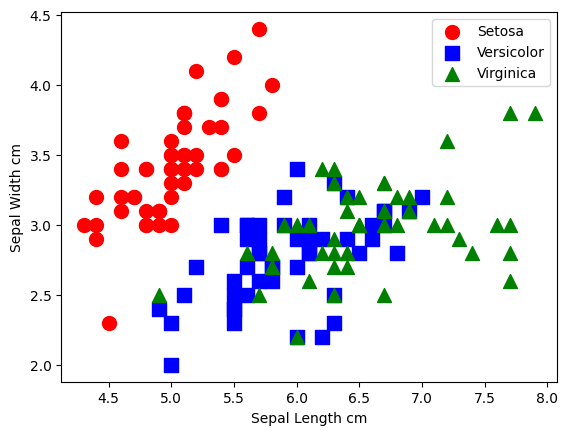

In [16]:
import numpy as np

df = pd.DataFrame(X, columns=X.columns)
df['species_id'] = y.values.ravel()

species_map = {
    'Iris-setosa': 'Setosa',
    'Iris-versicolor': 'Versicolor',
    'Iris-virginica': 'Virginica'
}

marker_map = ['o', 's', '^']
color_map = ['red', 'blue', 'green']
unique = np.unique(df['species_id'])
for marker, color, val in zip(marker_map, color_map, unique):
    toUse = (df['species_id'] == val)
    plt.scatter(X.loc[toUse, X.columns[0]], X.loc[toUse, X.columns[1]], marker=marker, color=color, label=species_map[val], s=100)
plt.xlabel('Sepal Length cm')
plt.ylabel('Sepal Width cm')
plt.legend()
plt.show()


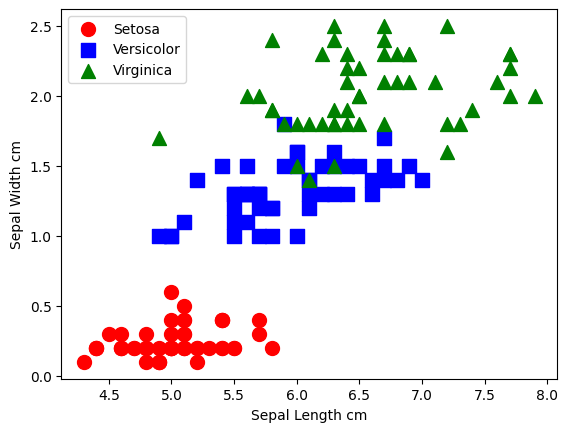

In [17]:
import numpy as np

df = pd.DataFrame(X, columns=X.columns)
df['species_id'] = y.values.ravel()

species_map = {
    'Iris-setosa': 'Setosa',
    'Iris-versicolor': 'Versicolor',
    'Iris-virginica': 'Virginica'
}

marker_map = ['o', 's', '^']
color_map = ['red', 'blue', 'green']

unique = np.unique(df['species_id'])
for marker, color, val in zip(marker_map, color_map, unique):
    toUse = (df['species_id'] == val)
    plt.scatter(X.loc[toUse, X.columns[0]], X.loc[toUse, X.columns[3]], marker=marker, color=color, label=species_map[val], s=100)
plt.xlabel('Sepal Length cm')
plt.ylabel('Sepal Width cm')
plt.legend()
plt.show()


In [19]:
W, b = log_reg.coef_, log_reg.intercept_
W

array([[-0.41556366,  0.90205271, -2.33520404, -1.00781613],
       [ 0.37163546, -0.25800742, -0.17123291, -0.80578287],
       [ 0.0439282 , -0.64404529,  2.50643695,  1.813599  ]])

In [20]:
b

array([  9.22515835,   2.50130355, -11.7264619 ])